In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import  matplotlib.pyplot as plt
from pylift import TransformedOutcome
pd.set_option('display.max_colwidth', None)

<h2> Data </h2>  For this example we will use the same data as for the Econml packaga and Causalml. The data exploration can be find in the other notebook 


<h2>Data Preparation </h2>
We are using the same cleaning methods as in the Econml notebook.

In [31]:
df = pd.read_csv('Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv')

df['history_segment'] = df['history_segment'].apply(lambda s: s.split(') ')[1])
df['history_segment'] = df['history_segment'].astype(str)
df['history_segment'] = [i.replace('$', '').replace(',', '').replace('-', '_').replace(' ', '') for i in df['history_segment']]

df = df.rename(columns= {'segment' : 'Treatment'})

# Create dummy columns
dummy_cols = ['zip_code', 'history_segment', 'channel']
for col in dummy_cols:
  df = pd.get_dummies(df, columns=[col], prefix=col)

# Encode the 'Treatment' Column

treatment_encoder = {'No E-Mail': 0, 'Mens E-Mail': 1, 'Womens E-Mail': 2}
df['Treatment'] = df['Treatment'].apply(lambda x: treatment_encoder[x])


In [32]:
pd.crosstab(df['visit'],df['Treatment'], margins= True)

Treatment,0,1,2,All
visit,,,,
0,19044,17413,18149,54606
1,2262,3894,3238,9394
All,21306,21307,21387,64000


<h2> Treatment and Control Group Selection </h2> 

Hillstrom dataset has 2 treatment and 1 control groups annotated respecively:
<ul>
<li>0, No E-Mail </li>
<li>1, Mens E-Mail </li>
<li>2, Womens E-Mail </li>
</ul>

To analysie each treatment seperatly we split the data into two subsets accordingly. Since the pylift package requires the treatment to be marked with 1, the entries with value 2 for Woman E-mail have be re-labled

In [42]:
df_woman = df[df['Treatment']!= 1]
df_woman['Treatment'] = np.where(df_woman['Treatment']==2, 1, 0)
df_men = df[df['Treatment']!= 2]

In [43]:
df_woman['Treatment'].unique()

array([1, 0])

In [45]:
pd.crosstab(df_woman['visit'],df_woman['Treatment'], margins= True)

Treatment,0,1,All
visit,,,
0,19044,18149,37193
1,2262,3238,5500
All,21306,21387,42693


In [46]:
pd.crosstab(df_men['visit'],df_men['Treatment'], margins= True)

Treatment,0,1,All
visit,,,
0,19044,17413,36457
1,2262,3894,6156
All,21306,21307,42613


In [47]:
up_men = TransformedOutcome(df_men, col_treatment='Treatment', col_outcome='visit', stratify=df_men['Treatment'])

up_men.randomized_search(n_iter=20, n_jobs=10, random_state=1)

up_men.shuffle_fit(params=up_men.rand_search_.best_params_, nthread=30, iterations=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   28.8s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  4.5min finished
Seed 0 finished.
Seed 1 finished.
Seed 2 finished.
Seed 3 finished.
Seed 4 finished.


{0: <pylift.methods.derivatives.TransformedOutcome at 0x1312b69a0>,
 1: <pylift.methods.derivatives.TransformedOutcome at 0x1d6e95100>,
 2: <pylift.methods.derivatives.TransformedOutcome at 0x12ce6dd00>,
 3: <pylift.methods.derivatives.TransformedOutcome at 0x1d6e95070>,
 4: <pylift.methods.derivatives.TransformedOutcome at 0x1243725b0>}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


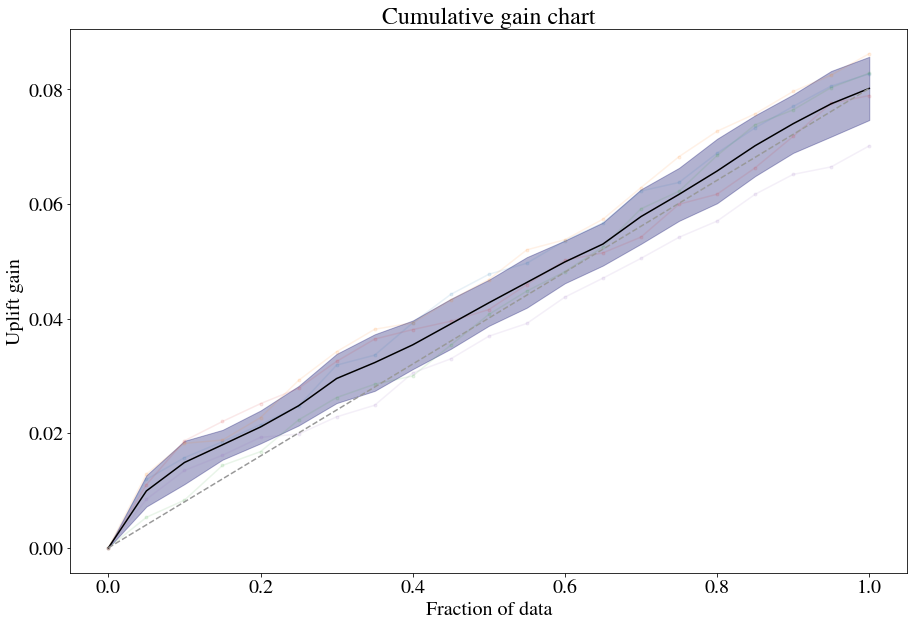

In [49]:
up_men.plot(show_shuffle_fits=True)

In [48]:
up_woman = TransformedOutcome(df_woman, col_treatment='Treatment', col_outcome='visit', stratify=df_woman['Treatment'])

up_woman.randomized_search(n_iter=20, n_jobs=10, random_state=1)

up_woman.shuffle_fit(params=up_men.rand_search_.best_params_, nthread=30, iterations=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   30.4s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  4.5min finished
Seed 0 finished.
Seed 1 finished.
Seed 2 finished.
Seed 3 finished.
Seed 4 finished.


{0: <pylift.methods.derivatives.TransformedOutcome at 0x12395df10>,
 1: <pylift.methods.derivatives.TransformedOutcome at 0x13524a580>,
 2: <pylift.methods.derivatives.TransformedOutcome at 0x124372760>,
 3: <pylift.methods.derivatives.TransformedOutcome at 0x137790c10>,
 4: <pylift.methods.derivatives.TransformedOutcome at 0x1ca4e7700>}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


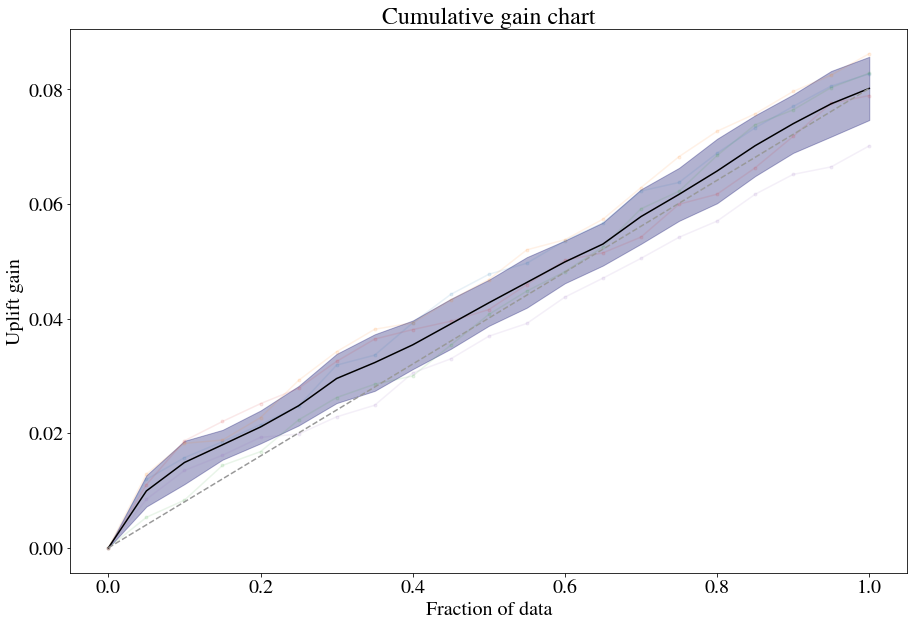

In [50]:
up_men.plot(show_shuffle_fits=True)